# Lesson Name
### Subtitle

In [14]:
import os
import requests
import matplotlib.pyplot as plt

In [ ]:
DPLA_API_KEY = os.getenv("DPLA_API_KEY")

In [ ]:
def get_dpla_counts(search_term, start_year, end_year):
    query = f"q={search_term}&sourceResource.date.after={start_year}&sourceResource.date.before={end_year}"
    
    response = requests.get(f"https://api.dp.la/v2/items?api_key={DPLA_API_KEY}&{query}")
    
    if response.status_code != 200:
        print(f"Response status code: {response.status_code}")
        
    resp_json = response.json()
    total_count = resp_json.get("count")
    
    return total_count


In [7]:
decades = [1850, 1860, 1870, 1880, 1890, 1900, 1910, 1920, 1930, 1940, 1950, 1960, 1970, 1980, 1990]

term = "suffrage"

In [8]:
results = {}
for decade in decades:
    end_year = decade + 9

    decade_counts = get_dpla_counts(term, decade, end_year)
    results[decade] = decade_counts

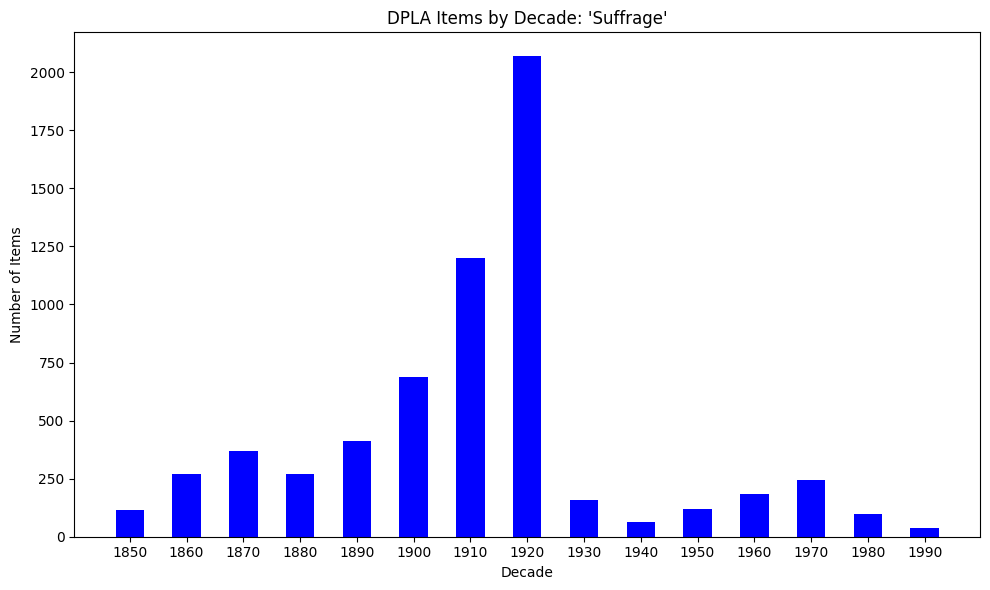

In [ ]:
decades = list(results.keys())
values  = list(results.values())

plt.figure(figsize=(10, 6))
plt.bar(decades, values, 5, color='blue')
plt.title(f"DPLA Items by Decade: '{term.capitalize()}'")
plt.xlabel("Decade")
plt.ylabel("Number of Items")
plt.xticks(decades, decades)
plt.tight_layout()
plt.show()